## Setup

In [1]:
from UTILITY_quickstart import *  
from tabulate import tabulate

#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml") 
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")  

#New DL10 centering 
importedDefaultSettings = importedDefaultSettings | {"centerDL10" : True}

#Low energy spread config, see "2025-04-17 Developing low energy spread through linacs case.ipynb"
#importedDefaultSettings = importedDefaultSettings | {"L1PhaseSet" : -10, "L2PhaseSet" : -7, "L3PhaseSet" : -7}

In [2]:
csrTF = True 
evalElement = "BEGBC20"   
inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"] 
bunchCount = importedDefaultSettings["bunchCount"] 
tao = initializeTao(     
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,          
    csrTF = csrTF,     
    numMacroParticles=1e4,     
    scratchPath = "/tmp",     
    randomizeFileNames = True,      
    transverseWakes = True 
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Transverse wakes enabled!
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_16748778314574854987.h5, and reinit to tao


In [3]:
trackBeam(tao, 
          trackEnd = "L0BFEND", 
          verbose = True
         ) 
PInit = getBeamAtElement(tao, "L0AFEND")

artificialFactor = 1.3 
#artificialFactor = 1.0 
PInit.x = artificialFactor * PInit.x 
PInit.px = artificialFactor * PInit.px 
PInit.y = artificialFactor * PInit.y 
PInit.py = artificialFactor * PInit.py  

makeBeamActiveBeamFile(PInit, tao = tao)

Loaded /tmp/beams/activeBeamFile_16748778314574854987.h5
Set track_start = L0AFEND, track_end = L0BFEND
Tracking!
trackBeam() exiting


In [4]:
# tao.lat_list("Q*", "ele.name", flags="-no_slaves")  
# Manually pared from above
quadsToPerturb = ['QM10771',  'QM10781',  'QA11132',  'Q11201',  'QA11265',  'Q11301',  'QM11312',  'QM11358',  'QM11362',  'QM11393',  'Q11401',  'Q11501',  'Q11601',  'Q11701',  'Q11801',  'Q11901',  'Q12201',  'Q12301',  'Q12401',  'Q12501',  'Q12601',  'Q12701',  'Q12801',  'Q12901',  'Q13201',  'Q13301',  'Q13401',  'Q13501',  'Q13601',  'Q13701',  'Q13801',  'Q13901',  'Q14201',  'Q14301',  'Q14401',  'Q14501',  'Q14601',  'Q14701',  'QM14715',  'QM14891',  'Q14901',  'Q15201',  'Q15301',  'Q15401',  'Q15501',  'Q15601',  'Q15701',  'Q15801',  'Q15901',  'Q16201',  'Q16301',  'Q16401',  'Q16501',  'Q16601',  'Q16701',  'Q16801',  'Q16901',  'Q17201',  'Q17301',  'Q17401',  'Q17501',  'Q17601',  'Q17701',  'Q17801',  'Q17901',  'Q18201',  'Q18301',  'Q18401',  'Q18501',  'Q18601',  'Q18701',  'Q18801',  'Q18901',  'Q19201',  'Q19301',  'Q19401',  'Q19501',  'Q19601',  'Q19701',  'Q19801',  'Q19851',  'Q19871', ]

In [5]:
#tao.lat_list("K*", "ele.name", flags="-no_slaves")
# Manually pared from above
linacsToPerturb = ['K11_4A', 'K11_4B', 'K11_4C', 'K11_4D', 'K11_5A', 'K11_5B', 'K11_5C', 'K11_5D', 'K11_6A', 'K11_6B', 'K11_6C', 'K11_6D', 'K11_7A', 'K11_7B', 'K11_7C', 'K11_7D', 'K11_8A', 'K11_8B', 'K11_8C', 'K11_8D', 'K12_1A', 'K12_1B', 'K12_1C', 'K12_1D', 'K12_2A', 'K12_2B', 'K12_2C', 'K12_2D', 'K12_3A', 'K12_3B', 'K12_3C', 'K12_3D', 'K12_4A', 'K12_4B', 'K12_4C', 'K12_4D', 'K12_5A', 'K12_5B', 'K12_5C', 'K12_5D', 'K12_6A', 'K12_6B', 'K12_6C', 'K12_6D', 'K12_7A', 'K12_7B', 'K12_7C', 'K12_7D', 'K12_8A', 'K12_8B', 'K12_8C', 'K12_8D', 'K13_1A', 'K13_1B', 'K13_1C', 'K13_1D', 'K13_2A', 'K13_2B', 'K13_2C', 'K13_2D', 'K13_3A', 'K13_3B', 'K13_3C', 'K13_3D', 'K13_4A', 'K13_4B', 'K13_4C', 'K13_4D', 'K13_5A', 'K13_5B', 'K13_5C', 'K13_5D', 'K13_6A', 'K13_6B', 'K13_6C', 'K13_6D', 'K13_7A', 'K13_7B', 'K13_7C', 'K13_7D', 'K13_8A', 'K13_8B', 'K13_8C', 'K13_8D', 'K14_1A', 'K14_1B', 'K14_1C', 'K14_1D', 'K14_2A', 'K14_2B', 'K14_2C', 'K14_2D', 'K14_3A', 'K14_3B', 'K14_3C', 'K14_3D', 'K14_4A', 'K14_4B', 'K14_4C', 'K14_4D', 'K14_5A', 'K14_5B', 'K14_5C', 'K14_5D', 'K14_6A', 'K14_6B', 'K14_6C', 'K14_6D', 'K15_1A', 'K15_1B', 'K15_1C', 'K15_1D', 'K15_2A', 'K15_2B', 'K15_2C', 'K15_3A', 'K15_3B', 'K15_3C', 'K15_3D', 'K15_4A', 'K15_4B', 'K15_4C', 'K15_4D', 'K15_5A', 'K15_5B', 'K15_5C', 'K15_5D', 'K15_6A', 'K15_6B', 'K15_6C', 'K15_6D', 'K15_7A', 'K15_7B', 'K15_7C', 'K15_7D', 'K15_8A', 'K15_8B', 'K15_8C', 'K15_8D', 'K16_1A', 'K16_1B', 'K16_1C', 'K16_1D', 'K16_2A', 'K16_2B', 'K16_2C', 'K16_2D', 'K16_3A', 'K16_3B', 'K16_3C', 'K16_3D', 'K16_4A', 'K16_4B', 'K16_4C', 'K16_4D', 'K16_5A', 'K16_5B', 'K16_5C', 'K16_5D', 'K16_6A', 'K16_6B', 'K16_6C', 'K16_6D', 'K16_7A', 'K16_7B', 'K16_7C', 'K16_7D', 'K16_8A', 'K16_8B', 'K16_8C', 'K16_8D', 'K17_1A', 'K17_1B', 'K17_1C', 'K17_1D', 'K17_2A', 'K17_2B', 'K17_2C', 'K17_2D', 'K17_3A', 'K17_3B', 'K17_3C', 'K17_3D', 'K17_4A', 'K17_4B', 'K17_4C', 'K17_4D', 'K17_5A', 'K17_5B', 'K17_5C', 'K17_5D', 'K17_6A', 'K17_6B', 'K17_6C', 'K17_6D', 'K17_7A', 'K17_7B', 'K17_7C', 'K17_7D', 'K17_8A', 'K17_8B', 'K17_8C', 'K17_8D', 'K18_1A', 'K18_1B', 'K18_1C', 'K18_1D', 'K18_2A', 'K18_2B', 'K18_2C', 'K18_2D', 'K18_3A', 'K18_3B', 'K18_3C', 'K18_3D', 'K18_4A', 'K18_4B', 'K18_4C', 'K18_4D', 'K18_5A', 'K18_5B', 'K18_5C', 'K18_5D', 'K18_6A', 'K18_6B', 'K18_6C', 'K18_6D', 'K18_7A', 'K18_7B', 'K18_7C', 'K18_7D', 'K18_8A', 'K18_8B', 'K18_8C', 'K18_8D', 'K19_1A', 'K19_1B', 'K19_1C', 'K19_1D', 'K19_2A', 'K19_2B', 'K19_2C', 'K19_2D', 'K19_3A', 'K19_3B', 'K19_3C', 'K19_3D', 'K19_4A', 'K19_4B', 'K19_4C', 'K19_4D', 'K19_5A', 'K19_5B', 'K19_5C', 'K19_5D', 'K19_6A', 'K19_6B', 'K19_6C', 'K19_6D', 'K19_8A1', 'K19_8A2', 'K19_8A3']

## Baseline

In [6]:
setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_16748778314574854987.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_16748778314574854987.h5
Loaded /tmp/beams/patchBeamFile_16748778314574854987.h5
Set track_start = ENDDL10, track_end = BEGBC20
Set track_end = BEGBC14_1
Tracking!
Also setting BC14 energy = 4.5 GeV, from 4.3984321939270785 GeV
Beam centered at BEGBC14 written to /tmp/beams/patchBeamFile_16748778314574854987.h5
Loaded /tmp/beams/patchBeamFile_16748778314574854987.h5
Set track_start = BEGBC14_1, track_end = BEGBC20
Tracking!
trackBeam() exiting


In [7]:
activeData = {}
for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "BEGBC20" ]:
    # print(activeEle)
    # print(f"""{getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6:.2f}, {getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6:.2f}""")
    # print()
    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6

printableData = { key : f"""{activeData[key]:.2f}""" for key in activeData.keys() }
printableData

{'PR10571_x': '3.88',
 'PR10571_y': '2.88',
 'WS12214_x': '4.52',
 'WS12214_y': '2.77',
 'BEGBC14_1_x': '5.21',
 'BEGBC14_1_y': '2.75',
 'ENDBC14_2_x': '6.05',
 'ENDBC14_2_y': '2.75',
 'BEGBC20_x': '7.02',
 'BEGBC20_y': '3.63'}

In [8]:

print(tabulate([
    ["PR10571",                  printableData["PR10571_x"], printableData["PR10571_y"]], 
    ["WS12214",                  printableData["WS12214_x"], printableData["WS12214_y"]],
    ["BEGBC14",                  printableData["BEGBC14_1_x"], printableData["BEGBC14_1_y"]],
    ["ENDBC14",                  printableData["ENDBC14_2_x"], printableData["ENDBC14_2_y"]],
    ["BEGBC20\n(L3 wire proxy)", printableData["BEGBC20_x"], printableData["BEGBC20_y"]]
], 
["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     "], 
tablefmt="grid"))

+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |        X      |        Y      |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           |          3.88 |          2.88 |
+-------------------+---------------+---------------+
| WS12214           |          4.52 |          2.77 |
+-------------------+---------------+---------------+
| BEGBC14           |          5.21 |          2.75 |
+-------------------+---------------+---------------+
| ENDBC14           |          6.05 |          2.75 |
+-------------------+---------------+---------------+
| BEGBC20           |          7.02 |          3.63 |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+


## Quad offsets - frequency study

In [9]:
quadsToPerturbSValues = [ tao.ele_head(ele)["s"] for ele in quadsToPerturb ] 

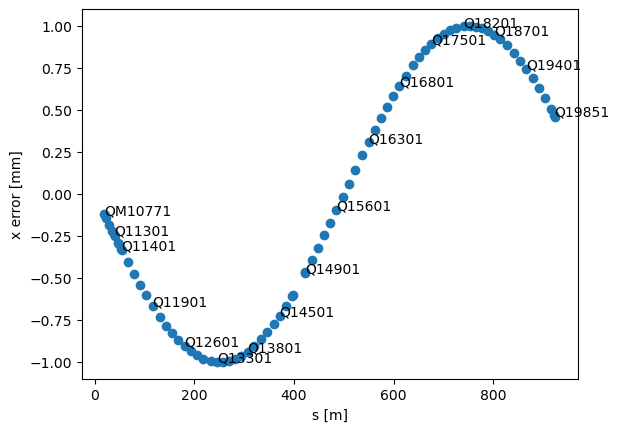

In [10]:
errorWavelength = 1000
errorAmplitude = 0.001
errorPhase = 3.1415 

quadPerturbValues = [ errorAmplitude * np.sin( s * 2 * 3.1415 / errorWavelength + errorPhase ) for s in quadsToPerturbSValues]



fig, ax = plt.subplots()
ax.scatter(quadsToPerturbSValues, 1e3 * np.array(quadPerturbValues) )

for i, txt in enumerate(quadsToPerturb):
    if i % 5 == 0:
        ax.annotate(txt, (quadsToPerturbSValues[i], (1e3 * np.array(quadPerturbValues))[i]))

ax.set_xlabel("s [m]")
ax.set_ylabel("x error [mm]")

plt.show()

Error wavelength = 2000 m


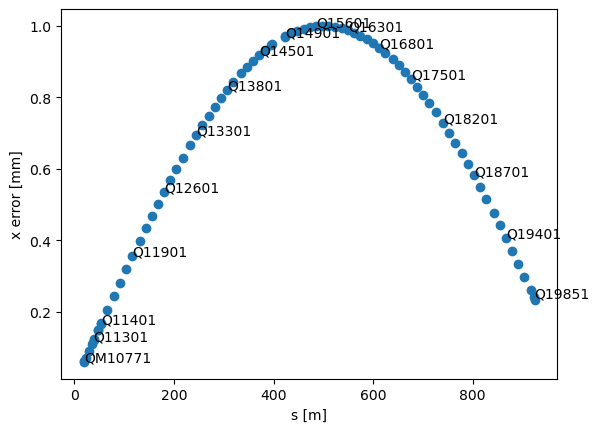

Error amplitude = 0.1 mm
+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |      X        |      Y        |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           | 3.88 ± 0.00   | 2.88 ± 0.00   |
+-------------------+---------------+---------------+
| WS12214           | 4.53 ± 0.24   | 2.77 ± 0.00   |
+-------------------+---------------+---------------+
| BEGBC14           | 5.20 ± 0.88   | 2.75 ± 0.00   |
+-------------------+---------------+---------------+
| ENDBC14           | 6.43 ± 1.07   | 2.75 ± 0.00   |
+-------------------+---------------+---------------+
| BEGBC20           | 7.79 ± 0.58   | 3.63 ± 0.00   |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+
Error amplitude = 0.5 mm
+-------------------+---------------+---------------+
| 90% RMS           |           

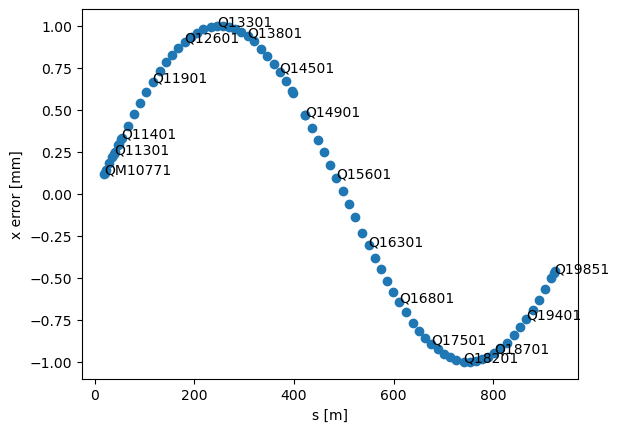

Error amplitude = 0.1 mm
+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |      X        |      Y        |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           | 3.88 ± 0.00   | 2.88 ± 0.00   |
+-------------------+---------------+---------------+
| WS12214           | 4.57 ± 0.28   | 2.77 ± 0.00   |
+-------------------+---------------+---------------+
| BEGBC14           | 5.22 ± 0.93   | 2.75 ± 0.00   |
+-------------------+---------------+---------------+
| ENDBC14           | 6.22 ± 1.00   | 2.75 ± 0.00   |
+-------------------+---------------+---------------+
| BEGBC20           | 7.38 ± 3.07   | 3.63 ± 0.00   |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+
Error amplitude = 0.5 mm
+-------------------+---------------+---------------+
| 90% RMS           |           

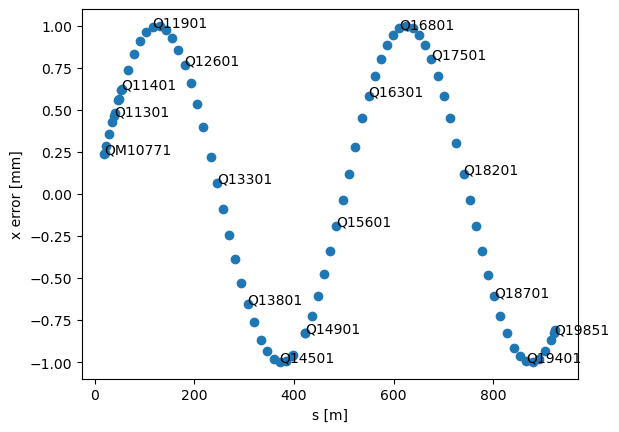

Error amplitude = 0.1 mm
+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |      X        |      Y        |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           | 3.88 ± 0.00   | 2.88 ± 0.00   |
+-------------------+---------------+---------------+
| WS12214           | 4.58 ± 0.39   | 2.77 ± 0.00   |
+-------------------+---------------+---------------+
| BEGBC14           | 5.26 ± 0.98   | 2.75 ± 0.00   |
+-------------------+---------------+---------------+
| ENDBC14           | 6.49 ± 1.25   | 2.75 ± 0.00   |
+-------------------+---------------+---------------+
| BEGBC20           | 7.48 ± 2.16   | 3.63 ± 0.00   |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+
Error amplitude = 0.5 mm
+-------------------+---------------+---------------+
| 90% RMS           |           

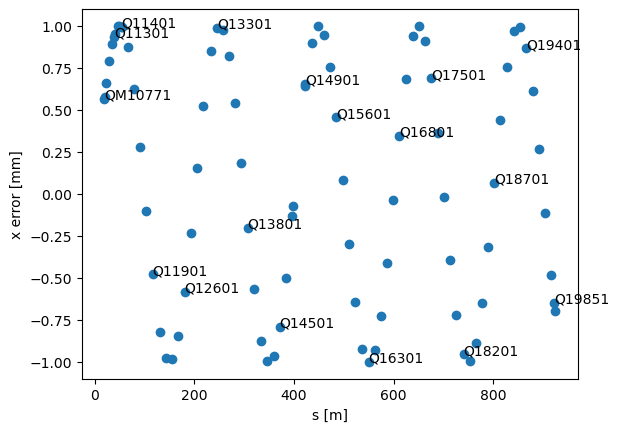

Error amplitude = 0.1 mm
+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |      X        |      Y        |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           | 3.88 ± 0.00   | 2.88 ± 0.00   |
+-------------------+---------------+---------------+
| WS12214           | 4.60 ± 0.45   | 2.77 ± 0.00   |
+-------------------+---------------+---------------+
| BEGBC14           | 5.25 ± 0.38   | 2.75 ± 0.00   |
+-------------------+---------------+---------------+
| ENDBC14           | 6.44 ± 0.48   | 2.75 ± 0.00   |
+-------------------+---------------+---------------+
| BEGBC20           | 7.52 ± 1.85   | 3.63 ± 0.00   |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+
Error amplitude = 0.5 mm
+-------------------+---------------+---------------+
| 90% RMS           |           

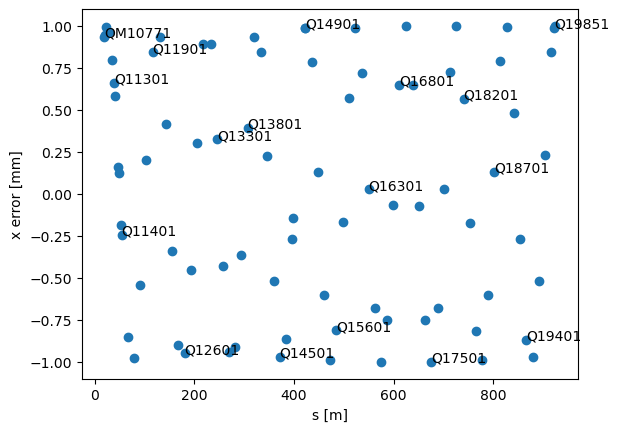

At least one phase fails
At least one phase fails
At least one phase fails
Error wavelength = 50 m


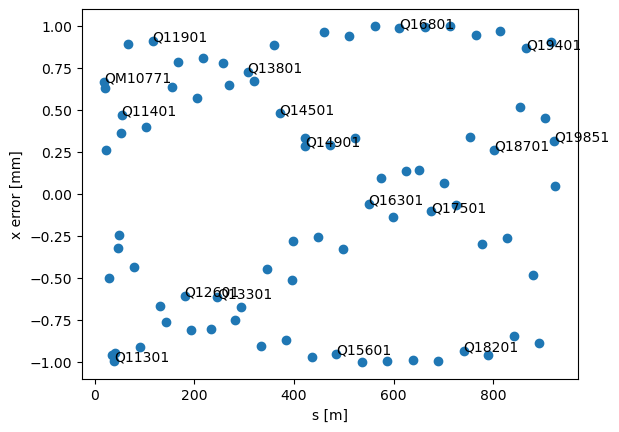

In [ ]:
#errorWavelength = 1000
#errorAmplitude = 1e-3
#errorPhase = 0 



for errorWavelength in [2000, 1000, 500, 200, 100, 50, 20, 10, 5, 2]:
   
    errorAmplitude = 1e-3
    errorPhase = 0
    print(f"Error wavelength = {errorWavelength} m")

    quadPerturbValues = [ errorAmplitude * np.sin( s * 2 * 3.1415 / errorWavelength + errorPhase ) for s in quadsToPerturbSValues]
    
    fig, ax = plt.subplots()
    ax.scatter(quadsToPerturbSValues, 1e3 * np.array(quadPerturbValues) )
    
    for i, txt in enumerate(quadsToPerturb):
        if i % 5 == 0:
            ax.annotate(txt, (quadsToPerturbSValues[i], (1e3 * np.array(quadPerturbValues))[i]))
    
    ax.set_xlabel("s [m]")
    ax.set_ylabel("x error [mm]")
    
    plt.show()


    for errorAmplitude in [100e-6, 500e-6, 1e-3]:

        
        results = []

        try:
        
            for errorPhase in np.arange(0, 2*3.1415, 3.1415 / 5):
         
                quadPerturbValues = [ errorAmplitude * np.sin( s * 2 * 3.1415 / errorWavelength + errorPhase ) for s in quadsToPerturbSValues]
            
                for eleII in range(len(quadsToPerturb)):
                    tao.cmd(f"set ele {quadsToPerturb[eleII]} X_OFFSET = {quadPerturbValues[eleII]}")
                
                trackBeam(tao, 
                          trackEnd = evalElement,
                          **importedDefaultSettings,
                          verbose = False
                         )
                
                activeData = {}
                for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "BEGBC20" ]:
                    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
                    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6
                
                results.append(activeData)
    
    
    
            
            
            printableData = {}
            for key in results[0].keys():
                activeData = [i[key] for i in results]
                printableData[key] = f"{np.median(activeData):.2f} ± {scipy.stats.iqr(activeData)/1.349:.2f}"
        
        
            print(f"Error amplitude = {errorAmplitude * 1e3} mm")
            print(tabulate([
                ["PR10571",                  printableData["PR10571_x"], printableData["PR10571_y"]], 
                ["WS12214",                  printableData["WS12214_x"], printableData["WS12214_y"]],
                 ["BEGBC14",                  printableData["BEGBC14_1_x"], printableData["BEGBC14_1_y"]],
                ["ENDBC14",                  printableData["ENDBC14_2_x"], printableData["ENDBC14_2_y"]],
                ["BEGBC20\n(L3 wire proxy)", printableData["BEGBC20_x"], printableData["BEGBC20_y"]]
            ], 
            ["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     "], 
            tablefmt="grid"))

        except:
            print("At least one phase fails")



